# Tugas Akhir
# Chihago Crimes Dataset

##### Anggota Kelompok:
1. Aditya Arya Hendrady (1506722733)
2. Arfi Renaldi (1506722872)
3. Harry Akbar Ali Munir (1506689080)
4. Rifki Adrian (1506726946)

###### Kelas A
###### Faculty of Computer Science, University of Indonesia

## 1) Environment Preparation

### 1.a) Library installation

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

c:\users\rifkiadrn\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2) Data Preparation

In [4]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

print("Jumlah row: {}".format(df.shape[0]))
print("Jumlah feature: {}".format(df.shape[1]))
df.head()

Jumlah row: 6582553
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


### 2.a) Data Cleansing

### Sampling

Sampling diperlukan karena terdapat jumlah baris yang sangat banyak (6582553 baris) sehingga akan menyebabkan proses komputasi yang besar. Data sample diambil sebanyak 30% sebanyak data populasi

In [9]:
import numpy as np
import random

seed=1234
df_sample = df.sample(n=300000, random_state=seed)
print("Jumlah row: {}".format(df_sample.shape[0]))
print("Jumlah feature: {}".format(df_sample.shape[1]))
df_sample

Jumlah row: 300000
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2278811,1907669,G764647,12/22/2001 07:27:39 PM,065XX W FULLERTON AV,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,False,...,NaN,NaN,06,1132143.0,1915273.0,2001,08/17/2015 03:03:40 PM,41.923750,-87.789884,"(41.92375, -87.789883682)"
1016706,3291674,HK324753,04/25/2004 08:00:07 PM,050XX S ARCHER AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,14.0,57.0,06,1149737.0,1870745.0,2004,02/10/2018 03:50:01 PM,41.801236,-87.726393,"(41.801235662, -87.726392523)"
3222276,9016615,HW164061,02/20/2013 06:10:00 PM,031XX N LINDER AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,30.0,19.0,06,1139148.0,1920417.0,2013,02/10/2018 03:50:01 PM,41.937741,-87.764019,"(41.937740973, -87.764018706)"
706672,11214959,JB130821,01/26/2018 05:45:00 PM,055XX S THROOP ST,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,16.0,67.0,03,NaN,NaN,2018,04/17/2018 03:54:41 PM,NaN,NaN,NaN
607676,11126175,JA481229,10/22/2017 11:44:00 AM,093XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,21.0,73.0,06,1167315.0,1842598.0,2017,02/10/2018 03:50:01 PM,41.723638,-87.662732,"(41.72363784, -87.662732163)"
3200730,8982513,HW129655,01/24/2013 02:03:00 PM,022XX W WARREN BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,2.0,28.0,26,1161433.0,1900312.0,2013,02/10/2018 03:50:01 PM,41.882136,-87.682677,"(41.882136043, -87.682677346)"
2386273,7341370,HS143328,01/30/2010 01:22:00 AM,069XX S WABASH AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,6.0,69.0,08B,1177921.0,1859115.0,2010,02/10/2018 03:50:01 PM,41.768729,-87.623384,"(41.768729167, -87.623384033)"
751955,11277610,JB213789,04/06/2018 01:38:00 PM,063XX S ASHLAND AVE,0560,ASSAULT,SIMPLE,CTA STATION,True,False,...,16.0,67.0,08A,1166756.0,1862726.0,2018,04/23/2018 03:50:11 PM,41.778884,-87.664206,"(41.778883826, -87.664206366)"
3232190,9032333,HW180325,03/05/2013 01:00:00 PM,052XX S KNOX AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,23.0,56.0,14,1146249.0,1869424.0,2013,02/10/2018 03:50:01 PM,41.797678,-87.739218,"(41.797677505, -87.739217941)"
5061251,4105826,HL447163,06/27/2005 10:00:00 AM,041XX S ARCHER AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,14.0,58.0,06,1157348.0,1876809.0,2005,02/28/2018 03:56:25 PM,41.817725,-87.698316,"(41.817725205, -87.698315681)"


### Mengecek Null Values

In [10]:
df_sample.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      151
Arrest                      0
Domestic                    0
Beat                        0
District                    4
Ward                    27838
Community Area          27891
FBI Code                    0
X Coordinate             5665
Y Coordinate             5665
Year                        0
Updated On                  0
Latitude                 5665
Longitude                5665
Location                 5665
dtype: int64

Dikarenakan adanya null values, sehingga kami perlu menghandle missing values.
Penanganan missing values ini dibagi menjadi 2 kategori yaitu pada data kategorikal dan data numerikal.
- Pada data numerikal, kami memutuskan untuk mengisi missing values dengan nilai median pada setiap fitur
- Pada data kategorikal, kami memutuskan untuk mengisi missing values dengan nilai modus pada setiap fitur

In [11]:
location_description_mode = df_sample["Location Description"].mode()
district_mean = df_sample["District"].mean()
ward_mean = df_sample["Ward"].mean()
community_area_mean = df_sample["Community Area"].mean()
x_coordinate_mean = df_sample["X Coordinate"].mean()
y_coordinate_mean = df_sample["Y Coordinate"].mean()
latitude_mean = df_sample["Latitude"].mean()
longitude_mean = df_sample["Longitude"].mean()

df_clean = df_sample.fillna(value={
    "Location Description": location_description_mode[0],
    "District" : district_mean,
    "Ward": ward_mean,
    "Community Area": community_area_mean,
    "X Coordinate": x_coordinate_mean,
    "Y Coordinate" : y_coordinate_mean,
    "Latitude" : latitude_mean,
    "Longitude" : longitude_mean,
    "Location" : "({},{})".format(latitude_mean, longitude_mean)
})

df_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Class Balancing

In [12]:
df_clean['Arrest'].value_counts()

False    215918
True      84082
Name: Arrest, dtype: int64

In [13]:
labelencoder_y = LabelEncoder()
arrest = labelencoder_y.fit_transform(df_clean["Arrest"])
df_clean["Arrest"] = arrest
domestic = labelencoder_y.fit_transform(df_clean["Domestic"])
df_clean["Domestic"] = domestic

df_clean['Arrest'].value_counts()
random.seed(42)
n = round(len(df_clean[df_clean['Arrest'] == 1]) * random.uniform(1.0, 2.0))
df_clean_balanced = df_clean[df_clean['Arrest'] == 1].append(df_clean[df_clean['Arrest'] == 0].sample(n))
df_clean_balanced['Arrest'].value_counts()

0    137846
1     84082
Name: Arrest, dtype: int64

###  Mengecek Outlier
Sebelum data digunakan lebih lanjut, kami perlu mengecek apakah ada outlier pada data.
Kami menggunakan box plot untuk melihat apakah ada outlier. Pada boxplot outlier ditandai dengan titik-titik hitam.

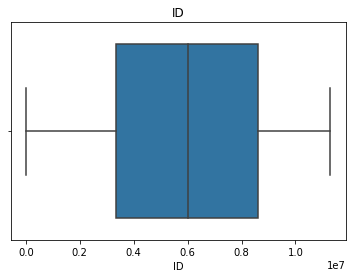

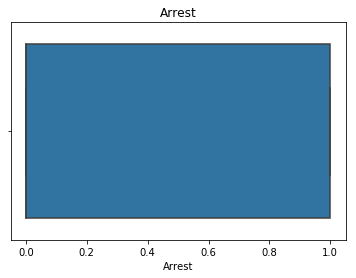

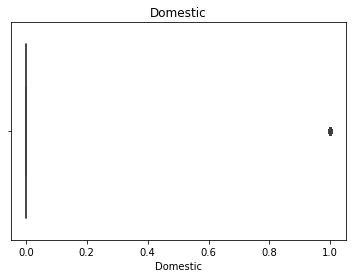

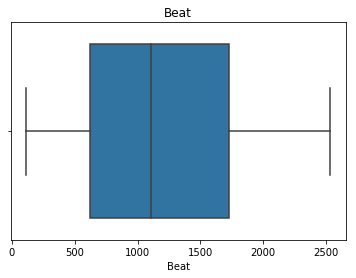

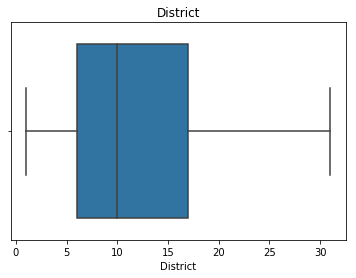

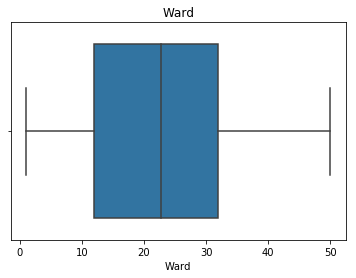

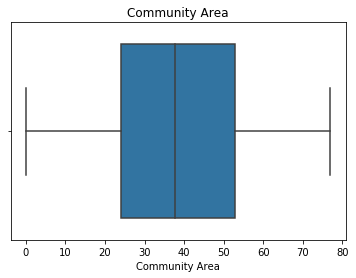

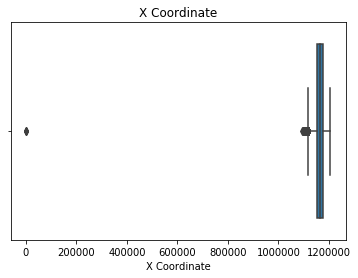

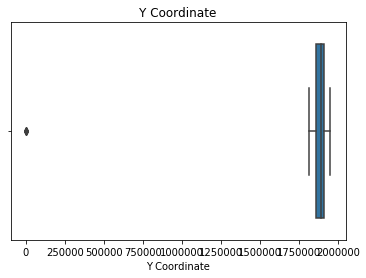

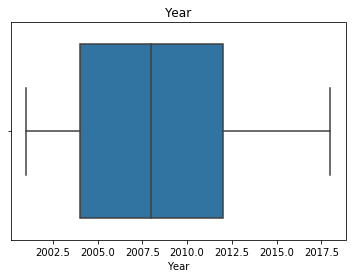

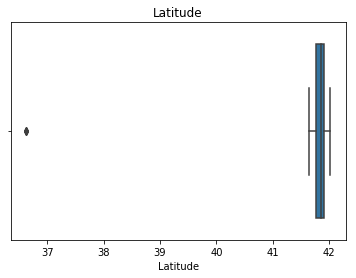

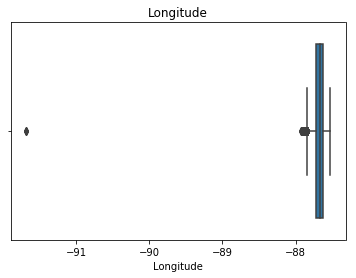

In [14]:
%matplotlib inline

def is_categorical(array_like):
    return array_like.dtype.name == 'object'

def box_plot(data, feature):
    if(not is_categorical(data)):
        sns.boxplot(data).set_title(feature)
        plt.show()

for i in df_clean:
    box_plot(df_clean_balanced[i], i)

Pada boxplot di atas terlihat bahwa ada beberapa feature yang memiliki outlier di dalamnya.
Diantaranya adalah:
- Domestic
- X Coordinate
- Y Coordinate
- Latitude
- Longitude

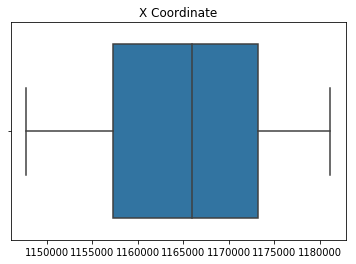

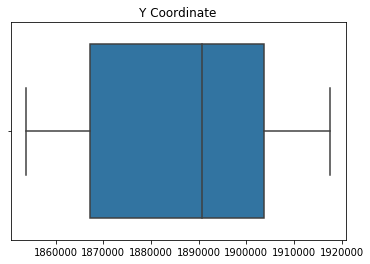

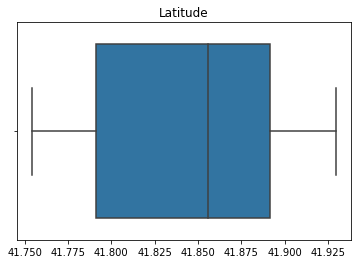

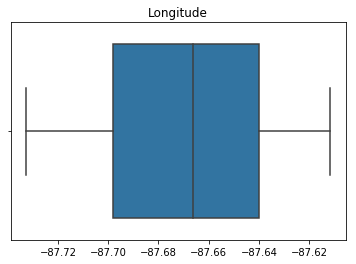

In [46]:
def remove_outlier(feature):
    arr = df_clean_balanced[feature]
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    final_list = [x for x in arr if (x > mean - 1 * sd)]
    final_list = [x for x in final_list if (x < mean + 1 * sd)]

    #visualisasi
    sns.boxplot(final_list).set_title(feature)
    plt.show()

features_with_outlier = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]
for feature in features_with_outlier:
    remove_outlier(feature)

In [47]:
df.describe() - df_sample.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.282553e+06,6.282553e+06,6.282506e+06,5.695537e+06,5.694415e+06,6.162807e+06,6.162807e+06,6.282553e+06,6.162807e+06,6.162807e+06
mean,-2.065963e+03,-1.060697e+00,-1.014537e-02,-2.180939e-02,1.958024e-02,-1.514040e+01,-2.783573e+01,-2.742417e-03,-7.644319e-05,-5.515044e-05
std,2.527953e+03,3.534510e-01,3.527891e-03,5.189060e-03,-5.907916e-03,2.072749e+02,2.028787e+02,4.541496e-03,5.669127e-04,6.979832e-04
min,-2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.772750e+03,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.150000e+01,-3.800000e+01,0.000000e+00,-5.809000e-05,-1.677030e-04
50%,-1.196500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,-1.460000e+02,0.000000e+00,-1.849470e-04,3.113600e-05
75%,4.798000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.025000e+01,0.000000e+00,-1.897110e-04,3.730000e-07
max,4.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.338000e-06


In [48]:
df_sample.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,3.000000e+05,300000.000000,299996.000000,272162.000000,272109.000000,2.943350e+05,2.943350e+05,300000.000000,294335.000000,294335.000000
mean,6.098301e+06,1194.293567,11.316144,22.677681,37.592230,1.164519e+06,1.885722e+06,2008.081097,41.842018,-87.671796
std,2.960565e+06,703.240683,6.942612,13.817983,21.539411,1.671785e+04,3.217001e+04,4.823990,0.088503,0.060634
min,6.610000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,3.378878e+06,623.000000,6.000000,10.000000,23.000000,1.152956e+06,1.859197e+06,2004.000000,41.768924,-87.713740
50%,6.071304e+06,1111.000000,10.000000,22.000000,32.000000,1.165942e+06,1.890516e+06,2008.000000,41.855097,-87.666334
75%,8.647126e+06,1732.000000,17.000000,34.000000,58.000000,1.176352e+06,1.909425e+06,2012.000000,41.907129,-87.628445
max,1.129271e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951622e+06,2018.000000,42.022910,-87.524532


Nah, sekarang data tersebut sudah tidak memiliki outlier.

### 2.b) Feature Extraction

Pada tahap ini, akan dipilih fitur mana yang akan digunakan dengan melihat korelasi antar fitur dengan metode Spearman dan/atau Pearson

In [69]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix

object_var = df_clean_balanced.select_dtypes(include=['object']).copy()
print(object_var.shape)
numeric_var = df_clean_balanced.select_dtypes(include=['int64','float64']).copy()

for col in object_var.columns:
    print("{} : {}".format(col, len(set(object_var[col]))))
    if(col != 'Date' and col != 'Block' and col != 'Updated On' and col != 'Location' and col != 'Case Number' and col !='Description'):
        print(col)
        object_var = pd.get_dummies(object_var, columns=[col])

df_encoded = pd.concat([object_var, numeric_var],axis=1)
df_encoded

(221928, 10)
Case Number : 221928
Date : 200238
Block : 34692
IUCR : 353
IUCR
Primary Type : 33
Primary Type
Description : 331
Location Description : 129
Location Description
FBI Code : 26
FBI Code
Updated On : 501
Location : 133640


,Case Number,Date,Block,Description,Updated On,Location,IUCR_0110,IUCR_0142,IUCR_0261,IUCR_0263,...,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
2278811,G764647,12/22/2001 07:27:39 PM,065XX W FULLERTON AV,$500 AND UNDER,08/17/2015 03:03:40 PM,"(41.92375, -87.789883682)",0,0,0,0,...,0,2512,25.0,22.677681,37.59223,1132143.0,1915273.0,2001,41.923750,-87.789884
607676,JA481229,10/22/2017 11:44:00 AM,093XX S ASHLAND AVE,RETAIL THEFT,02/10/2018 03:50:01 PM,"(41.72363784, -87.662732163)",0,0,0,0,...,0,2221,22.0,21.000000,73.00000,1167315.0,1842598.0,2017,41.723638,-87.662732
751955,JB213789,04/06/2018 01:38:00 PM,063XX S ASHLAND AVE,SIMPLE,04/23/2018 03:50:11 PM,"(41.778883826, -87.664206366)",0,0,0,0,...,0,725,7.0,16.000000,67.00000,1166756.0,1862726.0,2018,41.778884,-87.664206
6578205,HP426356,07/01/2008 04:40:04 AM,006XX N ST LOUIS AVE,DOMESTIC BATTERY SIMPLE,02/28/2018 03:56:25 PM,"(41.892615468, -87.713786211)",0,0,0,0,...,1,1121,11.0,27.000000,23.00000,1152934.0,1904068.0,2008,41.892615,-87.713786
2361805,HR712445,12/30/2009 10:12:11 PM,003XX S HOMAN AVE,DOMESTIC BATTERY SIMPLE,02/10/2018 03:50:01 PM,"(41.875876089, -87.71083785)",0,0,0,0,...,1,1134,11.0,28.000000,27.00000,1153781.0,1897974.0,2009,41.875876,-87.710838
1187937,HT106260,01/05/2011 12:05:00 PM,054XX N CLARK ST,FALSE POLICE REPORT,02/04/2016 06:33:39 AM,"(41.981158978, -87.668385639)",0,0,0,0,...,0,2013,20.0,48.000000,77.00000,1165045.0,1936426.0,2011,41.981159,-87.668386
2841193,HT382301,07/05/2011 10:30:00 PM,078XX S MORGAN ST,POSS: CANNABIS 30GMS OR LESS,02/10/2018 03:50:01 PM,"(41.751433076, -87.648912696)",0,0,0,0,...,0,612,6.0,17.000000,71.00000,1171007.0,1852756.0,2011,41.751433,-87.648913
5755976,HN437526,06/30/2007 11:15:00 AM,012XX W 73RD PL,MANU/DELIVER:CRACK,02/28/2018 03:56:25 PM,"(41.760490889, -87.655201339)",0,0,0,0,...,0,734,7.0,17.000000,67.00000,1169265.0,1856043.0,2007,41.760491,-87.655201
2655391,HS561129,10/12/2010 05:10:00 PM,015XX W 82ND ST,AGG PO HANDS NO/MIN INJURY,02/10/2018 03:50:01 PM,"(41.744907341, -87.662444921)",0,0,0,0,...,0,614,6.0,21.000000,71.00000,1167333.0,1850349.0,2010,41.744907,-87.662445
5335917,HM292143,04/15/2006 09:47:03 AM,028XX N LEAVITT ST,TO STATE SUP LAND,02/28/2018 03:56:25 PM,"(41.932828141, -87.681335491)",0,0,0,0,...,0,1913,19.0,1.000000,5.00000,1161658.0,1918787.0,2006,41.932828,-87.681335


#### Dimensionality Reduction

In [70]:
cols = df_encoded.columns

for i in cols:
    print(i)

Case Number
Date
Block
Description
Updated On
Location
IUCR_0110
IUCR_0142
IUCR_0261
IUCR_0263
IUCR_0264
IUCR_0265
IUCR_0266
IUCR_0271
IUCR_0272
IUCR_0273
IUCR_0274
IUCR_0275
IUCR_0281
IUCR_0291
IUCR_0312
IUCR_0313
IUCR_031A
IUCR_031B
IUCR_0320
IUCR_0325
IUCR_0326
IUCR_0330
IUCR_0331
IUCR_0334
IUCR_0337
IUCR_033A
IUCR_033B
IUCR_0340
IUCR_041A
IUCR_041B
IUCR_0420
IUCR_0430
IUCR_0440
IUCR_0450
IUCR_0451
IUCR_0452
IUCR_0453
IUCR_0454
IUCR_0460
IUCR_0461
IUCR_0462
IUCR_0470
IUCR_0479
IUCR_0480
IUCR_0481
IUCR_0482
IUCR_0483
IUCR_0484
IUCR_0485
IUCR_0486
IUCR_0487
IUCR_0488
IUCR_0489
IUCR_0493
IUCR_0495
IUCR_0496
IUCR_0497
IUCR_0498
IUCR_0499
IUCR_051A
IUCR_051B
IUCR_0520
IUCR_0530
IUCR_0545
IUCR_0550
IUCR_0551
IUCR_0552
IUCR_0553
IUCR_0554
IUCR_0555
IUCR_0556
IUCR_0557
IUCR_0558
IUCR_0560
IUCR_0580
IUCR_0581
IUCR_0583
IUCR_0584
IUCR_0610
IUCR_0620
IUCR_0630
IUCR_0650
IUCR_0810
IUCR_0820
IUCR_0840
IUCR_0841
IUCR_0842
IUCR_0843
IUCR_0850
IUCR_0860
IUCR_0865
IUCR_0870
IUCR_0880
IUCR_0890
IUCR_

In [71]:
data_target = df_encoded["Arrest"]

def is_categorical(array_like):
    return array_like.dtype.name == 'object'

correlation = pd.DataFrame()
for col in df_encoded:
    if col != 'Arrest' and not is_categorical(df_encoded[col]):
        pearson = df_encoded["Arrest"].corr(df_encoded[col], method='pearson')
        correlation.loc["Arrest-{}".format(col), "pearson"] = pearson
        spearman = df_encoded["Arrest"].corr(df_encoded[col], method='spearman')
        correlation.loc["Arrest-{}".format(col), "spearman"] = spearman
correlation.sort_values(by=['pearson'], ascending=False)

,pearson,spearman
Arrest-Primary Type_NARCOTICS,0.522333,0.522333
Arrest-FBI Code_18,0.503541,0.503541
Arrest-IUCR_1811,0.314105,0.314105
Arrest-IUCR_2027,0.201076,0.201076
Arrest-Location Description_SIDEWALK,0.186122,0.186122
Arrest-Primary Type_CRIMINAL TRESPASS,0.173419,0.173419
Arrest-IUCR_2024,0.173333,0.173333
Arrest-FBI Code_16,0.150549,0.150549
Arrest-Primary Type_PROSTITUTION,0.150473,0.150473
Arrest-IUCR_1330,0.149216,0.149216


## 3) Accuracy Testing

In [110]:
X = list(df_encoded)
for col in list(df_encoded):
    if is_categorical(df_encoded[col]):
        print(col)
        X.remove(col)

df_clean_balanced_encoded_without_categorical = df_encoded[X]
df_clean_balanced_encoded_without_categorical

Case Number
Date
Block
Description
Updated On
Location


,IUCR_0110,IUCR_0142,IUCR_0261,IUCR_0263,IUCR_0264,IUCR_0265,IUCR_0266,IUCR_0271,IUCR_0272,IUCR_0273,...,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
2278811,0,0,0,0,0,0,0,0,0,0,...,0,2512,25.0,22.677681,37.59223,1132143.0,1915273.0,2001,41.923750,-87.789884
607676,0,0,0,0,0,0,0,0,0,0,...,0,2221,22.0,21.000000,73.00000,1167315.0,1842598.0,2017,41.723638,-87.662732
751955,0,0,0,0,0,0,0,0,0,0,...,0,725,7.0,16.000000,67.00000,1166756.0,1862726.0,2018,41.778884,-87.664206
6578205,0,0,0,0,0,0,0,0,0,0,...,1,1121,11.0,27.000000,23.00000,1152934.0,1904068.0,2008,41.892615,-87.713786
2361805,0,0,0,0,0,0,0,0,0,0,...,1,1134,11.0,28.000000,27.00000,1153781.0,1897974.0,2009,41.875876,-87.710838
1187937,0,0,0,0,0,0,0,0,0,0,...,0,2013,20.0,48.000000,77.00000,1165045.0,1936426.0,2011,41.981159,-87.668386
2841193,0,0,0,0,0,0,0,0,0,0,...,0,612,6.0,17.000000,71.00000,1171007.0,1852756.0,2011,41.751433,-87.648913
5755976,0,0,0,0,0,0,0,0,0,0,...,0,734,7.0,17.000000,67.00000,1169265.0,1856043.0,2007,41.760491,-87.655201
2655391,0,0,0,0,0,0,0,0,0,0,...,0,614,6.0,21.000000,71.00000,1167333.0,1850349.0,2010,41.744907,-87.662445
5335917,0,0,0,0,0,0,0,0,0,0,...,0,1913,19.0,1.000000,5.00000,1161658.0,1918787.0,2006,41.932828,-87.681335


### 3.a) Test a few machine learning algorithm with your dataset

### Decision Tree Algorithm

In [121]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = list(df_clean_balanced_encoded_without_categorical)
X.remove("Arrest")
X = df_clean_balanced_encoded_without_categorical[X]
Y = df_clean_balanced_encoded_without_categorical["Arrest"]
test_size = 0.3
random_state = 22
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)


In [122]:
from sklearn.metrics import confusion_matrix
depth_range = range(2, 25)
accuracy_scores = []

max_accuracy = 0;
depth_with_max_accuracy = 0;
y_pred_of_max = []

for d in depth_range:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        y_pred_of_max = y_pred
        depth_with_max_accuracy = d
    accuracy_scores.append(accuracy)
    
print('Accuracy Max = {} at Max Depth = {}'.format(max_accuracy, depth_with_max_accuracy))

true_n, false_p, false_n, true_p = confusion_matrix(Y_test, y_pred_of_max).ravel()

print("True negative: ", true_n)
print("True positive: ", true_p)
print("False positive: ", false_p)
print("False negative: ", false_n)
confusion_matrix(Y_test, y_pred_of_max)

Accuracy Max = 0.8493368779945628 at Max Depth = 16
True negative:  39930
True positive:  16618
False positive:  1491
False negative:  8540


array([[39930,  1491],
       [ 8540, 16618]], dtype=int64)

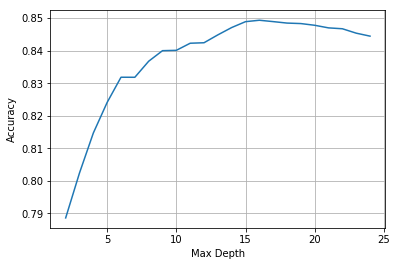

In [123]:
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [124]:
from sklearn.ensemble import RandomForestClassifier
depth_range = range(2, 25)
accuracy_scores = []

max_accuracy = 0;
depth_with_max_accuracy = 0;
y_pred_of_max = []

for d in depth_range:
    classifier = RandomForestClassifier(n_estimators= 30, criterion = 'entropy', max_depth=d)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        y_pred_of_max = y_pred
        depth_with_max_accuracy = d
    accuracy_scores.append(accuracy)
    
acc_max = max(accuracy_scores)
acc_max_idx = accuracy_scores.index(acc_max)

print('Accuracy Max = {} at Max Depth = {}'.format(max_accuracy, depth_with_max_accuracy))
true_n, false_p, false_n, true_p = confusion_matrix(Y_test, y_pred_of_max).ravel()

print("True negative: ", true_n)
print("True positive: ", true_p)
print("False positive: ", false_p)
print("False negative: ", false_n)
confusion_matrix(Y_test, y_pred_of_max)


Accuracy Max = 0.8486459694498265 at Max Depth = 24
True negative:  40445
True positive:  16057
False positive:  976
False negative:  9101


array([[40445,   976],
       [ 9101, 16057]], dtype=int64)

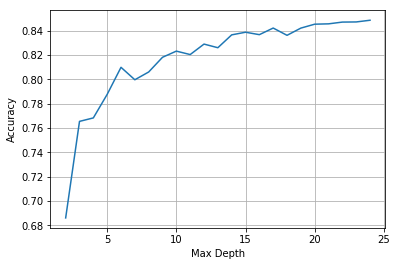

In [125]:
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()